# Actividad 11B


El objetivo de esta actividad es aplicar los conceptos teóricos presentados en las actividades de exploración.

Para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones), hay que establecer el parámetro `random_state` con un valor fijo en todas las funciones que tomen decisiones aleatorias. Para ello usaremos la siguiente constante.

In [1]:
RANDOM_STATE = 1234

# Carga del conjunto de datos


El primer paso es cargar un dataset donde los datos sean textuales, p.ej.: revisiones de películas tipo IMBD o noticias tipo Reuters. Este dataset debe estar en un fichero csv y no debe tener separados los datos en entrenamiento y validación.
El dataset hay que entregarlo también.

In [2]:
# CARGA DEL DATASET

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/EALC/"

emotion_file = path + "emotion.csv"

df = pd.read_csv(emotion_file)
df.head()

Mounted at /content/drive


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
# MUESTRA CUANTOS DATOS HAY, CUANTOS ATRIBUTOS, CUANTAS CLASES

print("Primeras filas del DataFrame:")
print(df.head())

# Obtener información general sobre el DataFrame
print("\nInformación general sobre el DataFrame:")
print(df.info())

# Contar los atributos

# Contar la cantidad de datos en el DataFrame
filas, columnas = df.shape
print(f"\nNúmero de filas: {filas}")
print(f"Número de columnas: {columnas}")

# Contar la cantidad de clases en el DataFrame

clases_count = df['Emotion'].nunique()
print(f"\nNúmero de clases: {clases_count}")

emociones_unicas = df['Emotion'].unique()
print("Tipos únicos de emociones:", emociones_unicas)


Primeras filas del DataFrame:
                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear

Información general sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB
None

Número de filas: 5937
Número de columnas: 2

Número de clases: 3
Tipos únicos de emociones: ['fear' 'anger' 'joy']


Forma: (5937, 2)
Columnas: Index(['Comment', 'Emotion'], dtype='object') 

Valores de las emociones:
anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64 



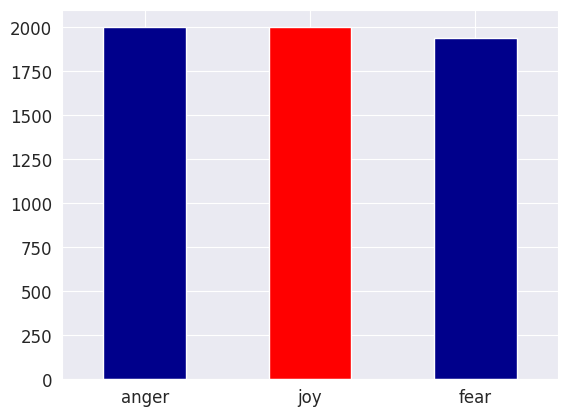

df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print('\033[1m' + 'Forma:' + '\033[0m', df.shape)
print('\033[1m' + 'Columnas:' + '\033[0m', df.columns, '\n')
print('\033[1m' + 'Valores de las emociones:' + '\033[0m')
print(df.Emotion.value_counts(), '\n')

with sns.axes_style("darkgrid"):
    df['Emotion'].value_counts().plot.bar(color=['darkblue', 'r'], rot=0, fontsize='large')
    plt.show()

print('\033[1m' + 'df.info:' + '\033[0m')
df.info()


In [5]:
# MUESTRA DOS INSTANCIAS DE DOS CLASES DISTINTAS
clase_1 = df[df['Emotion'] == 'fear']['Comment'].iloc[0]
clase_2 = df[df['Emotion'] == 'anger']['Comment'].iloc[0]

# Imprimir el texto de las instancias
print("\nTexto de la instancia de clase 1:")
print(clase_1)

print("\nTexto de la instancia de clase 2:")
print(clase_2)


Texto de la instancia de clase 1:
i seriously hate one subject to death but now i feel reluctant to drop it

Texto de la instancia de clase 2:
im so full of life i feel appalled


In [6]:
# PREPROCESAMIENTO DEL DATASET
import re
import nltk
from nltk.corpus import stopwords

wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords') # añadido
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

# Crear una nueva columna 'review_normalized' en el DataFrame
df['comment_normalized'] = df['Comment'].apply(normalize_document)

# Verificar el DataFrame resultante
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Comment,Emotion,comment_normalized
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,anger,im full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,joy,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious one outside like rapture happe...
5,i feel jealous becasue i wanted that kind of l...,anger,feel jealous becasue wanted kind love true con...
6,when a friend of mine keeps telling me morbid ...,anger,friend mine keeps telling morbid things happen...
7,i finally fell asleep feeling angry useless an...,anger,finally fell asleep feeling angry useless stil...
8,i feel a bit annoyed and antsy in a good way,anger,feel bit annoyed antsy good way
9,i feel like i ve regained another vital part o...,joy,feel like regained another vital part life living


In [7]:
# SEPARACIÓN DEL DATASET EN ENTRENAMIENTO Y VALIDACIÓN

from sklearn.model_selection import train_test_split

X = df['comment_normalized']
y = df['Emotion']

# Dividimos el conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


# Imprimir la cantidad de textos en entrenamiento y prueba después de la división
print("Training texts:", len(X_train))
print("Test texts:", len(X_test))

Training texts: 4749
Test texts: 1188


In [8]:
# Importar las bibliotecas necesarias
from sklearn.feature_extraction.text import CountVectorizer

# Tokenizar y contar las palabras únicas en 'comment_normalized'
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['comment_normalized'])

# Obtener la lista de palabras únicas
unique_words = vectorizer.get_feature_names_out()

# Contar la cantidad de palabras únicas
num_unique_words = len(unique_words)

print(f"Número de palabras únicas: {num_unique_words}")


Número de palabras únicas: 8817


In [9]:
# PREPARA LOS DATOS PARA INTRODUCIRLOS EN UNA RED NEURONAL

from keras.preprocessing.text import Tokenizer

dict_size = 8817
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(df['comment_normalized'])

print('\033[1m' + 'Dictionary size:' + '\033[0m', dict_size)
print('\033[1m' + 'Length of the tokenizer index:' + '\033[0m', len(tokenizer.word_index))
print('\033[1m' + 'Number of documents the tokenizer was trained on:' + '\033[0m', tokenizer.document_count, '\n')
print('\033[1m' + 'First 20 entries of the tokenizer index:' + '\033[0m')
print(*list(tokenizer.word_index.items())[:20])


Dictionary size: 8817
Length of the tokenizer index: 8834
Number of documents the tokenizer was trained on: 5937 

First 20 entries of the tokenizer index:
('feel', 1) ('feeling', 2) ('like', 3) ('im', 4) ('little', 5) ('really', 6) ('know', 7) ('time', 8) ('get', 9) ('want', 10) ('people', 11) ('bit', 12) ('would', 13) ('think', 14) ('even', 15) ('one', 16) ('still', 17) ('ive', 18) ('way', 19) ('going', 20)


In [10]:
train_tokens = tokenizer.texts_to_sequences(X_train)
test_tokens = tokenizer.texts_to_sequences(X_test)
seq_lengths =  np.array([len(sequence) for sequence in train_tokens])

In [11]:
from scipy import stats

upper_bound = int(np.mean(seq_lengths) + 2 * np.std(seq_lengths))
percentage = stats.percentileofscore(seq_lengths, upper_bound)

print('The value of upper_bound is %d and the percentage of sequences in "train_rev_tokens" \
of length smaller or equal than upper_bound is %.2f%%.' % (upper_bound, round(percentage, 2)))

The value of upper_bound is 19 and the percentage of sequences in "train_rev_tokens" of length smaller or equal than upper_bound is 94.22%.


In [12]:
from keras.preprocessing.sequence import pad_sequences

train_pad = pad_sequences(train_tokens, maxlen=upper_bound)
test_pad = pad_sequences(test_tokens, maxlen=upper_bound)

print('\033[1m' + 'train_rev_pad.shape:' + '\033[0m', train_pad.shape)
print('\033[1m' + 'test_rev_pad.shape:' + '\033[0m', test_pad.shape, '\n')

train_rev_pad.shape: (4749, 19)
test_rev_pad.shape: (1188, 19) 



In [13]:
from numpy import random

idx_pad = random.randint(0, len(train_pad)-1)
print('\033[1m' + 'Review #%d after padding:' %idx_pad + '\033[0m' + '\n', train_pad[idx_pad])

Review #2471 after padding:
 [   0    0    0    0    0    0    0   34    1   86  235  124   93  270
   86 1365    1   47   86]


In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=8817):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_pad)
# Our vectorized test data
x_test = vectorize_sequences(test_pad)
print(x_train.shape)
print(x_test.shape)

(4749, 8817)
(1188, 8817)


In [15]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()

y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_numeric, num_classes=3)
y_test_one_hot = to_categorical(y_test_numeric, num_classes=3)


In [16]:
print(x_train.shape,y_train_one_hot.shape)
print(x_test.shape, y_test_one_hot.shape)

(4749, 8817) (4749, 3)
(1188, 8817) (1188, 3)


In [17]:
print(np.unique(y_train))
print(label_encoder.classes_)


['anger' 'fear' 'joy']
['anger' 'fear' 'joy']


In [18]:
print(y_train_one_hot.dtype)
print(np.min(y_train_one_hot), np.max(y_train_one_hot))


float32
0.0 1.0


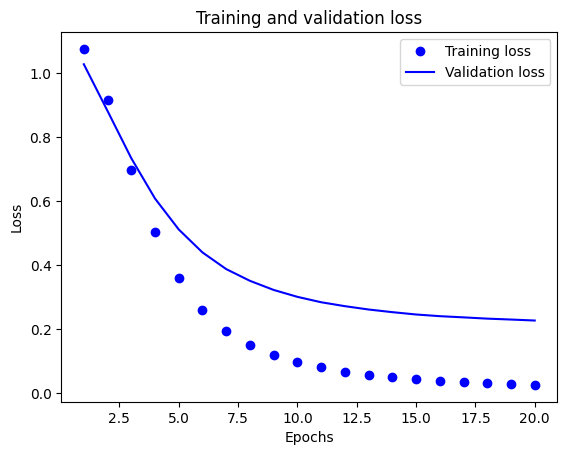

In [21]:
# CONSTRUIR UNA RED NEURONAL SENCILLA


# DEFINICIÓN DE INPUT_SHAPE

input_shape = [8817]


# DEFINE UN MODELO CON DOS CAPAS

from keras import models
from keras import layers
import keras

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=input_shape))
model.add(layers.Dense(3, activation='softmax'))  # Ajusta esto a 3 neuronas


# COMPILA EL MODELO

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train_one_hot[:1000]
partial_y_train = y_train_one_hot[1000:]

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# ENTRENA EL MODELO

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    callbacks=[early_stopping],
                    verbose=0,
                    validation_data=(x_val, y_val))


# DIBUJA LAS CURVAS DE APRENDIZAJE

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:
# EVALÚA EL MODELO
val_predictions = model.predict(x_val)
print(val_predictions)

score1 = model.evaluate(x_val, y_val, verbose=1)
print("Accuracy: ", score1[1])

32/32 [==============================] - 0s 4ms/step
[[0.00744949 0.9856924  0.00685814]
 [0.15455048 0.75817555 0.08727398]
 [0.01160775 0.03381523 0.95457697]
 ...
 [0.00554708 0.98347324 0.01097974]
 [0.9956911  0.00329579 0.00101302]
 [0.37763295 0.6117691  0.01059792]]
32/32 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9250
Accuracy:  0.925000011920929


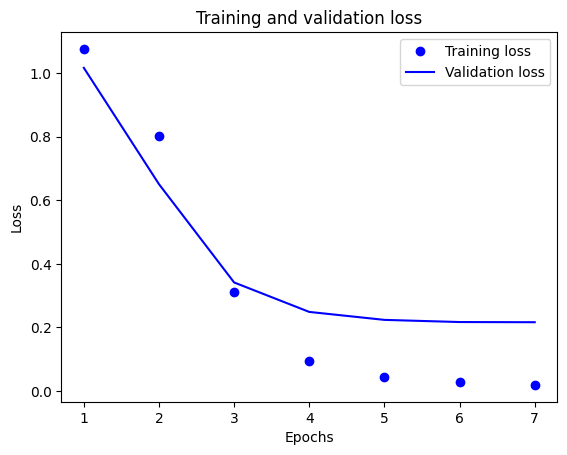

In [24]:
# CONSTRUIR UNA RED NEURONAL CON VARIAS CAPAS

# DEFINICIÓN DE INPUT_SHAPE

input_shape = [8817]

from keras import models
from keras import layers
import keras

# DEFINE UN MODELO CON VARIAS CAPAS

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=input_shape))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))  # Ajusta esto a 3 neuronas


# COMPILA EL MODELO

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# ENTRENA EL MODELO
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=128,
                    verbose=0,
                    validation_data=(x_val, y_val))


# DIBUJA LAS CURVAS DE APRENDIZAJE

import matplotlib.pyplot as plt

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [25]:
# EVALÚA EL MODELO
val_predictions = model2.predict(x_val)
print(val_predictions)

score2 = model2.evaluate(x_val, y_val, verbose=1)
print("Accuracy: ", score2[1])

32/32 [==============================] - 0s 8ms/step
[[2.2537163e-03 9.9722111e-01 5.2518043e-04]
 [2.1275543e-01 7.0415002e-01 8.3094575e-02]
 [6.9186790e-03 9.3334457e-03 9.8374784e-01]
 ...
 [4.4537764e-03 9.9090588e-01 4.6402579e-03]
 [9.9765712e-01 1.7717046e-03 5.7111995e-04]
 [4.6240491e-01 5.3538710e-01 2.2079770e-03]]
32/32 [==============================] - 1s 15ms/step - loss: 0.2165 - accuracy: 0.9230
Accuracy:  0.9229999780654907


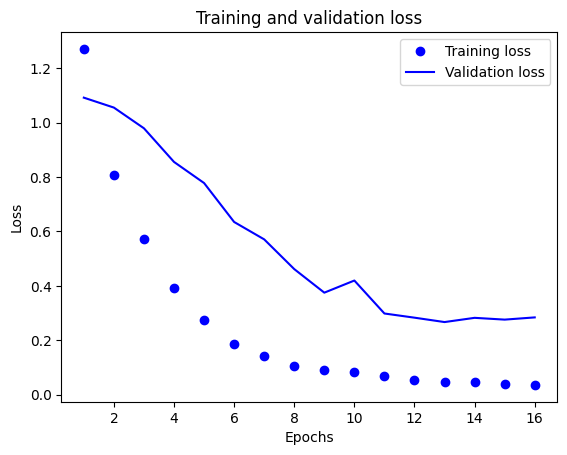

In [38]:
# CONSTRUIR UNA RED NEURONAL CON VARIAS CAPAS Y REGULARIZACIÓN

# DEFINICIÓN DE INPUT_SHAPE

input_shape = [8817]


# DEFINE UN MODELO CON VARIAS CAPAS

model3 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(3, activation='softmax'),
])


# COMPILA EL MODELO

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
)


# ENTRENA EL MODELO
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=128,
                    verbose=0,
                    callbacks=[early_stopping],
                    validation_data=(x_val, y_val))





# DIBUJA LAS CURVAS DE APRENDIZAJE

import matplotlib.pyplot as plt

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [39]:
# EVALÚA EL MODELO
val_predictions = model3.predict(x_val)
print(val_predictions)

score3 = model3.evaluate(x_val, y_val, verbose=1)
print("Accuracy: ", score3[1])

32/32 [==============================] - 0s 6ms/step
[[0.05258021 0.9379103  0.00950942]
 [0.20641036 0.71292627 0.08066336]
 [0.03215163 0.18110931 0.78673905]
 ...
 [0.00271717 0.9912511  0.00603176]
 [0.99377114 0.00406435 0.00216453]
 [0.51029104 0.45069855 0.03901053]]
32/32 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.9070
Accuracy:  0.9070000052452087


In [40]:
# ESCRIBE Y COMPARA TODOS LOS RESULTADOS DE ACCURACY OBTENIDOS POR TODOS LOS MODELOS E INDICA CUAL ES MEJOR
print(score1[1], score2[1], score3[1])

0.925000011920929 0.9229999780654907 0.9070000052452087


Había obtenido resultados de accuracy más altos para los dos últimos modelos, no sé por qué al volver a ejecutarlos, los resultados han cambiado y ahora el que mejor funciona es el modelo sencillo.

In [47]:
# PARA EL MEJOR MODELO BUSCA UN EJEMPLO QUE FALLE Y TRATA DE EXPLICAR PORQUE FALLA
import numpy as np

# Predice las etiquetas para el conjunto de prueba
y_pred = model.predict(x_test)

# Convierte las predicciones a etiquetas numéricas
y_pred_numeric = np.argmax(y_pred, axis=1)

# Convierte las etiquetas reales a etiquetas numéricas
y_test_numeric = np.argmax(y_test_one_hot, axis=1)

# Encuentra los índices de las predicciones incorrectas
misclassified_indices = np.where(y_pred_numeric != y_test_numeric)[0]
# Obtén la lista de palabras únicas del tokenizer
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
unique_words = [reverse_word_index[i] for i in range(1, len(word_index) + 1)]

# Convierte las predicciones y etiquetas reales a etiquetas de texto
predicted_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
true_labels = label_encoder.inverse_transform(np.argmax(y_test_one_hot, axis=1))

# Imprime algunos ejemplos mal clasificados
for index in misclassified_indices[:min(3, len(misclassified_indices))]:
    print(f"Índice: {index}")
    print(f"Texto de entrada:")
    print(X_test.iloc[index])  # Asumiendo que X_test es tu DataFrame de texto
    print(f"Predicción: {predicted_labels[index]}, Etiqueta real: {true_labels[index]}")
    print("\n" + "="*50 + "\n")


38/38 [==============================] - 1s 11ms/step
Índice: 0
Texto de entrada:
got bit caught moment forgot core rude comments silly songs real feelings beloved brilliant comic actor sweet big hearted young woman
Predicción: anger, Etiqueta real: joy


Índice: 6
Texto de entrada:
feel safe encoding utf locale en isprivate false ismobile false mobileclass isprivateblog false languagedirection ltr feedlinks link rel alternate type application atom xml title could use standing ovation could
Predicción: fear, Etiqueta real: joy


Índice: 20
Texto de entrada:
started feel super emotional time strange
Predicción: fear, Etiqueta real: joy




El primer ejemplo que se muestra, el modelo lo ha clasificado como "anger" cuando en realidad, es "joy". Parece que para el modelo las palabras "rude comments" y "silly songs" han tenido más peso que "beloved", "brilliant actor" y "sweet big hearted". En el tercer ejemplo, se ha etiquetado como "fear" cuando en realidad, era "joy". De nuevo aquí, el modelo le da más peso a "strange" que ha "super emotional". Supongo que el fallo es que las descripciones de las emociones son muy cortas, teniendo un máximo de 19 palabras como calculamos al principio del cuaderno. Esto hace que haya situaciones en las que a lo mejor haya la misma cantidad de palabras asociadas a una emoción que a otra. En estos casos se ha de ser muy preciso y algo que para un humano es claro de identificar, para el modelo puede ser más complicado. La solución sería tener textos más largos para que el modelo calcule bien los pesos de las palabras que le dan la clave en la clasificación de la emoción. De todas maneras, hemos conseguido un modelo con más de un 90% de acierto.